In [3]:
import cPickle as pk
fname = 'data/pdata_raw'
fname = 'data/pdata'
fname = 'data/1000pdata'
fname = 'data/1000pdata'

# fname = 'data/5000pdata'


pdata = pk.load(open(fname,'rb'))

In [13]:
%%time
# print "finished"
hmms = HMMprofile.objects.defer('text').all().prefetch_related('hits')
hmms = hmms.annotate(hcount = Count('hits')).order_by('id')

hmmids = list(hmms.values_list('id',flat = True))
hcounts = list(hmms.values_list('hcount',flat = True))
sfs = list(hmms.values_list('cath_node__parent',flat = True))

sDB = seqDB.objects.get(name = 'CATH')
sDB.sequence_set.count()
seq = sDB.sequence_set.first()

seqset_all = sDB.sequence_set.all().prefetch_related('hmmprofile_set')

# seq.HMMprofile
# seq.hmmprofile
# dir(seq)
seq.hmmprofile_set.count()

# hcounts_pad = hcounts_
hmmids_pad = hmmids[:]
hmmids_pad.insert(0, None)

hcounts_pad = hcounts[:]
hcounts_pad.insert(0,None)

sfs_pad = sfs[:]
sfs_pad.insert(0,None)

CPU times: user 136 ms, sys: 20 ms, total: 156 ms
Wall time: 1min 7s


In [19]:
# hcounts_pad = hcounts_
hmmids_pad = hmmids[:]
hmmids_pad.insert(0, None)

hcounts_pad = hcounts[:]
hcounts_pad.insert(0,None)

sfs_pad = sfs[:]
sfs_pad.insert(0,None)

In [ ]:
%%time
dct = classification.objects.in_bulk(sfs)

sf_db = [None] + [ dct[x] for x in sfs if x ]
sfs_db = [dct[sfi] for sfi in sfs]

topo_db =  [x.parent if x else None for x in sf_db   ]
arch_db =  [x.parent if x else None for x in topo_db ]
class_db = [x.parent if x else None for x in arch_db ]

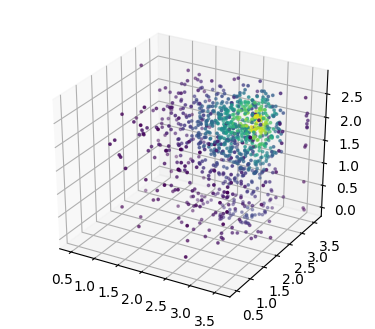

In [4]:
import numpy as np
from scipy import stats


import matplotlib
%matplotlib inline
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
kwargs = {
    'projection':'3d',
}
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)


# xyz = np.vstack([xss,yss,zss])
kde = stats.gaussian_kde(pdata)
xss,yss,zss = pdata
ax1.scatter(xss,yss,zss,'.',3, c = kde(pdata))

X = np.linspace(xss.min(), xss.max(),30)
Y = np.linspace(yss.min(), yss.max(),30)
# Z = np.linspace(zss.min(), zss.max(),30)
# Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X + Y) / 2 - 2
# surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha = 0.5, 
#                        linewidth=0, antialiased=False)

In [21]:
np_hcounts_pad = np.array(hcounts_pad)
# np_hcounts_pad = np.array(hcounts_pad)

In [26]:
import cPickle as pk
fname = 'data/pdata'
pdata = pk.load(open(fname,'rb'))
xss,yss,zss = pdata

import  numpy as np

In [31]:
xss = np.array(xss)
yss = np.array(yss)
zss = np.array(zss)

zss = ( np.log10( zss + 1 ) - 
        ( np.log10( np_hcounts_pad[ int (10**(xss)) ] + 1 ) +
         np.log10( np_hcounts_pad [ int (10 **yss) ] + 1 )  
        )/2.
      )

pdata = np.vstack( [ xss, yss, zss ]  )

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)

def init():
#     ax1 = fig.add_subplot(111,**kwargs)
    pts = ax1.scatter(xss,yss,zss,'.',3, c = kde([xss,yss,zss]))# for angle in range(0, 360):
#     surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha = 0.5, 
#                        linewidth=0, antialiased=False)
    return (fig,)


def animate(i):
#     angle = i*0.5
#     pts = ax1.scatter(xss,yss,zss,'.',3, c = kde([xss,yss,zss]))# for angle in range(0, 360):
#     ax1.view_init(30, angle
    ax1.view_init(elev=10., azim=i*10)
#     plt.draw()
#     plt.pause(.001)
    return (fig,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=180, interval=20, blit=True);
HTML(anim.to_html5_video())

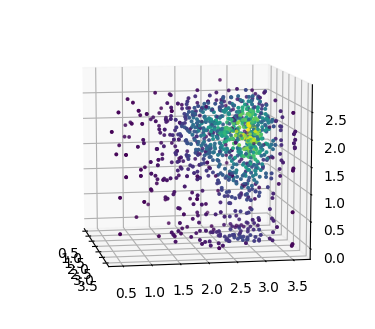

In [6]:
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)

def init():
#     ax1 = fig.add_subplot(111,**kwargs)
    pts = ax1.scatter(xss,yss,zss,'.',3, c = kde([xss,yss,zss]))# for angle in range(0, 360):
#     surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha = 0.5, 
#                        linewidth=0, antialiased=False)
    return (fig,)


def animate(i):
#     angle = i*0.5
#     pts = ax1.scatter(xss,yss,zss,'.',3, c = kde([xss,yss,zss]))# for angle in range(0, 360):
#     ax1.view_init(30, angle
    ax1.view_init(elev=10., azim=i*10)
#     plt.draw()
#     plt.pause(.001)
    return (fig,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=180, interval=200, blit=True);
HTML(anim.to_html5_video())

In [12]:
anim.save?

In [13]:
anim.save(fname + '.mov')

In [7]:
HTML(anim.to_html5_video())

In [49]:
fname = 'data/ISS_norm'
D_curr= pk.load(open(fname,'rb'))

In [51]:
from tst.domutil.util import *
from tst.domutil.test import *

/home/shouldsee/.local/lib/python2.7/site-packages/Bio/SearchIO/__init__.py:211: BiopythonExperimentalWarning: Bio.SearchIO is an experimental submodule which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)
/home/shouldsee/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [55]:
c1 = hcounts_pad[x]
hmm1 = hmms.get(id = x )
c2 = hmm1.hits.count()
print c1,c2
# hmm1.hits.values_lits()

146 146


In [52]:
it = using_tocoo_izip(D_curr)
c = counter([],INF = 1)
for x,y,v_act in it:
    # hmm1 = hmms.get(id = x + 1)
    # hmm2 = hmms.get(id = y + 1)    
    hmm1 = hmms.get(id = x )
    hmm2 = hmms.get(id = y )
    hmm1hits = hmm1.hits.values_list('id')
    hmm2hits = hmm2.hits.values_list('id')
    interhits = set(hmm1hits) & set(hmm2hits)
    intercount = len(interhits)

    v_exp = ISS_normalise( len(hmm1hits), len(hmm2hits), intercount)
#         print v
#         print intercount
    msg = '[OK] %s against %s overlaps:: Expected:%s, Actual:%s'%(hmm1,hmm2, v_exp, v_act )
    print msg
    assert v_exp == v_act,'[ERROR] %s against %s overlaps:: Expected %s, Actual: %s '%(hmm1,hmm2, v_exp, v_act )
    c.count()
    if c.i == 5:
        break

[OK] HMM for 2.60.40.10.648.0  against HMM for 2.60.40.10.369.0  overlaps:: Expected:0.0601073651003, Actual:0.0601073651003
0 of -1
[OK] HMM for 3.40.50.1820.108.0  against HMM for 3.40.50.1820.70.0  overlaps:: Expected:0.0216775447446, Actual:0.0216775447446
[OK] HMM for 3.40.50.300.171.0  against HMM for 3.40.50.2300.51.0  overlaps:: Expected:1.86655583645, Actual:1.86655583645
[OK] HMM for 2.60.40.10.290.0  against HMM for 2.10.70.10.35.0  overlaps:: Expected:3.04753445764, Actual:3.04753445764
[OK] HMM for 2.130.10.10.46.0  against HMM for 2.120.10.10.8.0  overlaps:: Expected:0.22779808213, Actual:0.22779808213
